# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
# import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

from keras.regularizers import l1,l2
from keras import layers

In [134]:
# Load Data
dataset=pd.read_csv('drive/MyDrive/Colab Notebooks/CarPrice_Assignment.csv')

In [135]:
# Display head
display(dataset.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [136]:
# Check for null values
print(dataset.isnull())
print(dataset.isnull().sum())

     car_ID  symboling  CarName  fueltype  ...  peakrpm  citympg  highwaympg  price
0     False      False    False     False  ...    False    False       False  False
1     False      False    False     False  ...    False    False       False  False
2     False      False    False     False  ...    False    False       False  False
3     False      False    False     False  ...    False    False       False  False
4     False      False    False     False  ...    False    False       False  False
..      ...        ...      ...       ...  ...      ...      ...         ...    ...
200   False      False    False     False  ...    False    False       False  False
201   False      False    False     False  ...    False    False       False  False
202   False      False    False     False  ...    False    False       False  False
203   False      False    False     False  ...    False    False       False  False
204   False      False    False     False  ...    False    False       False

In [137]:
# Check for duplicate data rows
print(dataset[dataset.duplicated()])

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []


In [138]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [139]:
car_dataset=dataset.copy()

In [140]:
# One hot encode object columns
column3= pd.get_dummies(car_dataset.iloc[:, 3:4]).astype(dtype="float64")
column4= pd.get_dummies(car_dataset.iloc[:, 4:5]).astype(dtype="float64")
column5= pd.get_dummies(car_dataset.iloc[:, 5:6]).astype(dtype="float64")
column6= pd.get_dummies(car_dataset.iloc[:, 6:7]).astype(dtype="float64")
column7= pd.get_dummies(car_dataset.iloc[:, 7:8]).astype(dtype="float64")
column8= pd.get_dummies(car_dataset.iloc[:, 8:9]).astype(dtype="float64")
column14= pd.get_dummies(car_dataset.iloc[:, 14:15]).astype(dtype="float64")
column15= pd.get_dummies(car_dataset.iloc[:, 15:16]).astype(dtype="float64")
column17= pd.get_dummies(car_dataset.iloc[:, 17:18]).astype(dtype="float64")

In [141]:
# Remove the old object columns
car_dataset.drop(columns=["CarName", "fueltype", "aspiration", "doornumber", "carbody","drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"], axis=1, inplace=True)
car_dataset.drop(columns=["car_ID"], axis=1, inplace=True)


In [142]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


In [143]:
# Normalize the data
max=car_dataset.max()
min=car_dataset.min()
car_dataset=(car_dataset-min)/(max-min)

car_dataset=car_dataset.iloc[:,:-1]
Y=car_dataset.iloc[:,-1:]


In [144]:
# Concatenate newly hot encoded columns with the rest of data
X =pd.concat([ column3, column4, column5, column6, column7, column8, column14, column15, column17, car_dataset], axis=1)

In [145]:
# split train test data
train_data, test_data, train_targets, test_targets=train_test_split(X, Y, test_size=0.3, random_state=1)

In [146]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

In [147]:
# Model
from keras import models
from keras import regularizers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(32, kernel_regularizer=regularizers.l1( l1=0.001), activation = "relu", input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(10,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
  model.add(layers.Dense(8,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
  model.add(layers.Dense(6,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
  model.add(layers.Dense(1))
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [148]:
# Using values at each epoch
num_epochs = 200
all_train_mae = []
all_val_mae=[]

all_train_loss=[]
all_val_loss=[]

k=4
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                       train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],
                                          train_labels[(i + 1) * num_val_samples:]],axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,validation_data=
                      (val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
  
  val_mae = history.history['val_mae']
  train_mae = history.history['mae']

  val_loss=history.history['val_loss']
  train_loss=history.history['loss']

  all_train_loss.append(train_loss)
  all_val_loss.append(val_loss)

  all_val_mae.append(val_mae)  
  all_train_mae.append(train_mae) 


# taking average of epochs at each fold
average_val_mae = [
np.mean([x[i] for x in all_val_mae]) for i in range(num_epochs)]

average_train_mae = [
np.mean([x[i] for x in all_train_mae]) for i in range(num_epochs)]

average_train_loss = [
np.mean([x[i] for x in all_train_loss]) for i in range(num_epochs)]

average_val_loss = [
np.mean([x[i] for x in all_val_loss]) for i in range(num_epochs)]

print(np.min(average_val_mae))
print(np.min(average_train_mae))


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
0.00738332187756896
0.011730677215382457


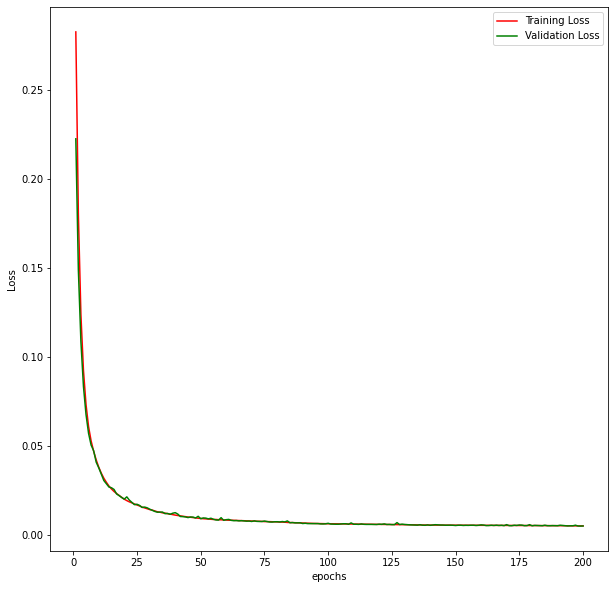

In [149]:
# Graph between Training Loss and Validation Loss
plt.figure(figsize=(10,10))
plt.plot(range(1, len(average_train_loss) + 1),average_train_loss,'r',label="Training Loss")
plt.plot(range(1, len(average_val_loss) + 1),average_val_loss,'g',label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

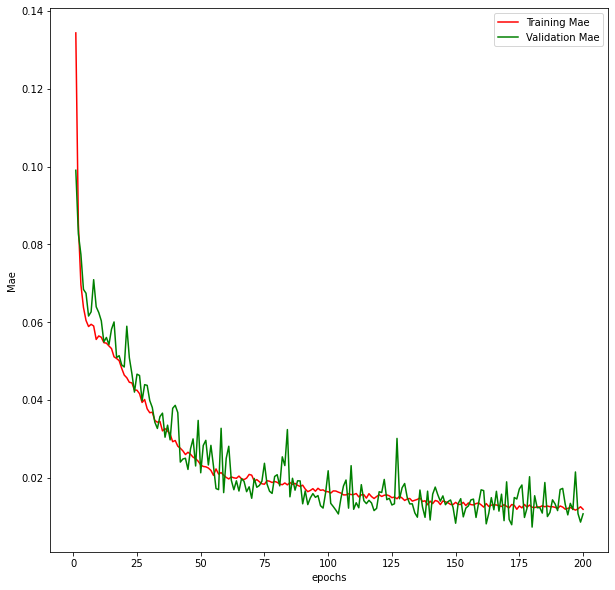

In [150]:
# Graph between Training Mae and Validation Mae
plt.figure(figsize=(10,10))
plt.plot(range(1, len(average_train_mae) + 1),average_train_mae,'r',label="Training Mae")
plt.plot(range(1, len(average_val_mae) + 1),average_val_mae,'g',label='Validation Mae')
plt.xlabel('epochs')
plt.ylabel('Mae')
plt.legend()
plt.show()

In [151]:
# Evaluate Model
model = build_model()
model.fit(train_data, train_targets,epochs=100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 6ms/step - loss: 0.0101 - mae: 0.0629


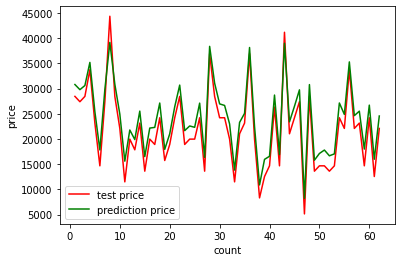

In [152]:
# Prediction
y_pred=model.predict(test_data)
y_pred=y_pred.reshape((y_pred.shape[0]))


y_test1=(test_targets*(max[-1]-min[-1]))+min[-1]
y_pred=(y_pred*(max[-1]-min[-1]))+min[-1]


plt.plot(range(1,len(y_test1)+1),y_test1,'r',label="test price")
plt.plot(range(1,len(y_pred)+1),y_pred,'g',label="prediction price")
plt.xlabel("count")
plt.ylabel('price')
plt.legend()
plt.show()
